##### Import Necessary Modules Required for EDA

In [21]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

##### Reading Data from the csv file

In [22]:
df = pd.read_csv(r'data.csv', encoding='ISO-8859-1')

In [23]:
df.head()

,EEID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,Black,55,4/8/2016,"$141,604",15%,United States,Seattle,10/16/2021
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,Asian,59,11/29/1997,"$99,975",0%,China,Chongqing,NaN
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,Caucasian,50,10/26/2006,"$163,099",20%,United States,Chicago,NaN
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,Caucasian,26,9/27/2019,"$84,913",7%,United States,Chicago,NaN
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,Asian,55,11/20/1995,"$95,409",0%,United States,Phoenix,NaN


In [24]:
df.dtypes

EEID             object
Full Name        object
Job Title        object
Department       object
Business Unit    object
Gender           object
Ethnicity        object
Age               int64
Hire Date        object
Annual Salary    object
Bonus %          object
Country          object
City             object
Exit Date        object
dtype: object

##### Getting the names of the columns

In [25]:
df.columns

Index(['EEID', 'Full Name', 'Job Title', 'Department', 'Business Unit',
       'Gender', 'Ethnicity', 'Age', 'Hire Date', 'Annual Salary', 'Bonus %',
       'Country', 'City', 'Exit Date'],
      dtype='object')

##### Renaming the Columns for better access

In [26]:
columns = df.columns
columns = columns.str.replace(' ','_')
columns = columns.str.replace('Bonus_%','Bonus')
columns = columns.str.lower()
columns

Index(['eeid', 'full_name', 'job_title', 'department', 'business_unit',
       'gender', 'ethnicity', 'age', 'hire_date', 'annual_salary', 'bonus',
       'country', 'city', 'exit_date'],
      dtype='object')

In [27]:
rename_dict = dict(zip(df.columns, columns))
df.rename(columns=rename_dict, inplace = True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   eeid           1000 non-null   object
 1   full_name      1000 non-null   object
 2   job_title      1000 non-null   object
 3   department     1000 non-null   object
 4   business_unit  1000 non-null   object
 5   gender         1000 non-null   object
 6   ethnicity      1000 non-null   object
 7   age            1000 non-null   int64 
 8   hire_date      1000 non-null   object
 9   annual_salary  1000 non-null   object
 10  bonus          1000 non-null   object
 11  country        1000 non-null   object
 12  city           1000 non-null   object
 13  exit_date      85 non-null     object
dtypes: int64(1), object(13)
memory usage: 109.5+ KB


###### Dropping The column `'exit_date & bonus'` cause more than half of it's column are null

In [29]:
df.drop(columns=['exit_date', 'bonus'], inplace=True)

##### Formating the Columns `'annual_salary'` and changing the datatype of `'annual_salary'` AS `numeric` and `'hire_date'` AS date

In [30]:
df['annual_salary'] = df['annual_salary'].str.replace('$', '')
df['annual_salary'] = df['annual_salary'].str.replace(',', '')
df['annual_salary'] = pd.to_numeric(df['annual_salary'])

In [31]:
df['hire_date'] = pd.to_datetime(df['hire_date'])

###### Checking if the columns has been formatted and converted to appropriate datatype for analysis

In [32]:
df.dtypes

eeid                     object
full_name                object
job_title                object
department               object
business_unit            object
gender                   object
ethnicity                object
age                       int64
hire_date        datetime64[ns]
annual_salary             int64
country                  object
city                     object
dtype: object

In [33]:
df.describe()

,age,hire_date,annual_salary
count,1000.000000,1000,1000.000000
mean,44.382000,2012-04-07 02:54:14.400000,113217.365000
min,25.000000,1992-01-09 00:00:00,40063.000000
25%,35.000000,2007-02-14 00:00:00,71430.250000
50%,45.000000,2014-02-15 12:00:00,96557.000000
75%,54.000000,2018-06-22 00:00:00,150782.250000
max,65.000000,2021-12-26 00:00:00,258498.000000
std,11.246981,NaN,53545.985644


###### Importing python module `SQLAlchemy` for inserting the dataframe to a table and use query to get data from SQL. Here `cred` contains the user credentials for connecting to Postgres Server

In [34]:
from sqlalchemy import create_engine
import cred

In [35]:
engine = create_engine(f'postgresql://{cred.username}:{cred.password}@{cred.host}:{cred.port}/{cred.database}')

In [36]:
try:
    df.to_sql('employees', con=engine.connect() , index=False)
except ValueError as e:
    print("Table named employees already exists")

Table named employees already exists


##### Data is Cleaned and Loaded to SQL for EDA

In [37]:
%%sql
SELECT *
FROM employees
LIMIT 10;

,eeid,full_name,job_title,department,business_unit,gender,age,hire_date,annual_salary,country,city
0,E02387,Emily Davis,Sr. Manger,IT,Research & Development,Female,55,2016-04-08 00:00:00.000000,141604,United States,Seattle
1,E04105,Theodore Dinh,Technical Architect,IT,Manufacturing,Male,59,1997-11-29 00:00:00.000000,99975,China,Chongqing
2,E02572,Luna Sanders,Director,Finance,Speciality Products,Female,50,2006-10-26 00:00:00.000000,163099,United States,Chicago
3,E02832,Penelope Jordan,Computer Systems Manager,IT,Manufacturing,Female,26,2019-09-27 00:00:00.000000,84913,United States,Chicago
4,E01639,Austin Vo,Sr. Analyst,Finance,Manufacturing,Male,55,1995-11-20 00:00:00.000000,95409,United States,Phoenix
5,E00644,Joshua Gupta,Account Representative,Sales,Corporate,Male,57,2017-01-24 00:00:00.000000,50994,China,Chongqing
6,E01550,Ruby Barnes,Manager,IT,Corporate,Female,27,2020-07-01 00:00:00.000000,119746,United States,Phoenix
7,E04332,Luke Martin,Analyst,Finance,Manufacturing,Male,25,2020-05-16 00:00:00.000000,41336,United States,Miami
8,E04533,Easton Bailey,Manager,Accounting,Manufacturing,Male,29,2019-01-25 00:00:00.000000,113527,United States,Austin
9,E03838,Madeline Walker,Sr. Analyst,Finance,Speciality Products,Female,34,2018-06-13 00:00:00.000000,77203,United States,Chicago


In [38]:
%%sql
SELECT job_title, COUNT(*) AS No_Of_Employees, AVG(annual_salary) AS Avg_Salary
FROM employees
GROUP BY job_title
ORDER BY 2 DESC, 3 DESC;

,job_title,no_of_employees,avg_salary
0,Director,121,171633.851240
1,Sr. Manger,110,141067.763636
2,Vice President,105,222195.171429
3,Manager,98,113275.683673
4,Sr. Analyst,70,86402.957143
5,Analyst II,53,62647.471698
6,Analyst,51,49950.666667
7,Computer Systems Manager,21,80346.809524
8,Field Engineer,21,78928.952381
9,Account Representative,21,62281.619048


In [39]:
%%sql
SELECT 
    EXTRACT (YEAR FROM employees.hire_date) AS year,
    gender,
    COUNT(EXTRACT (YEAR FROM employees.hire_date))
FROM
    employees
GROUP BY EXTRACT (YEAR FROM employees.hire_date), gender
ORDER BY 3 DESC;

,year,gender,count
0,2021,Female,51
1,2018,Female,39
2,2017,Female,37
3,2019,Female,36
4,2020,Female,35
5,2021,Male,35
6,2017,Male,33
7,2019,Male,32
8,2014,Female,32
9,2020,Male,31


##### After loading the data to database and querying The table for some insights on the data. Then comes visualization for conveying the finding in a easy understandable manner

In [40]:
matplotlib.rcParams.update({'font.size': 12})

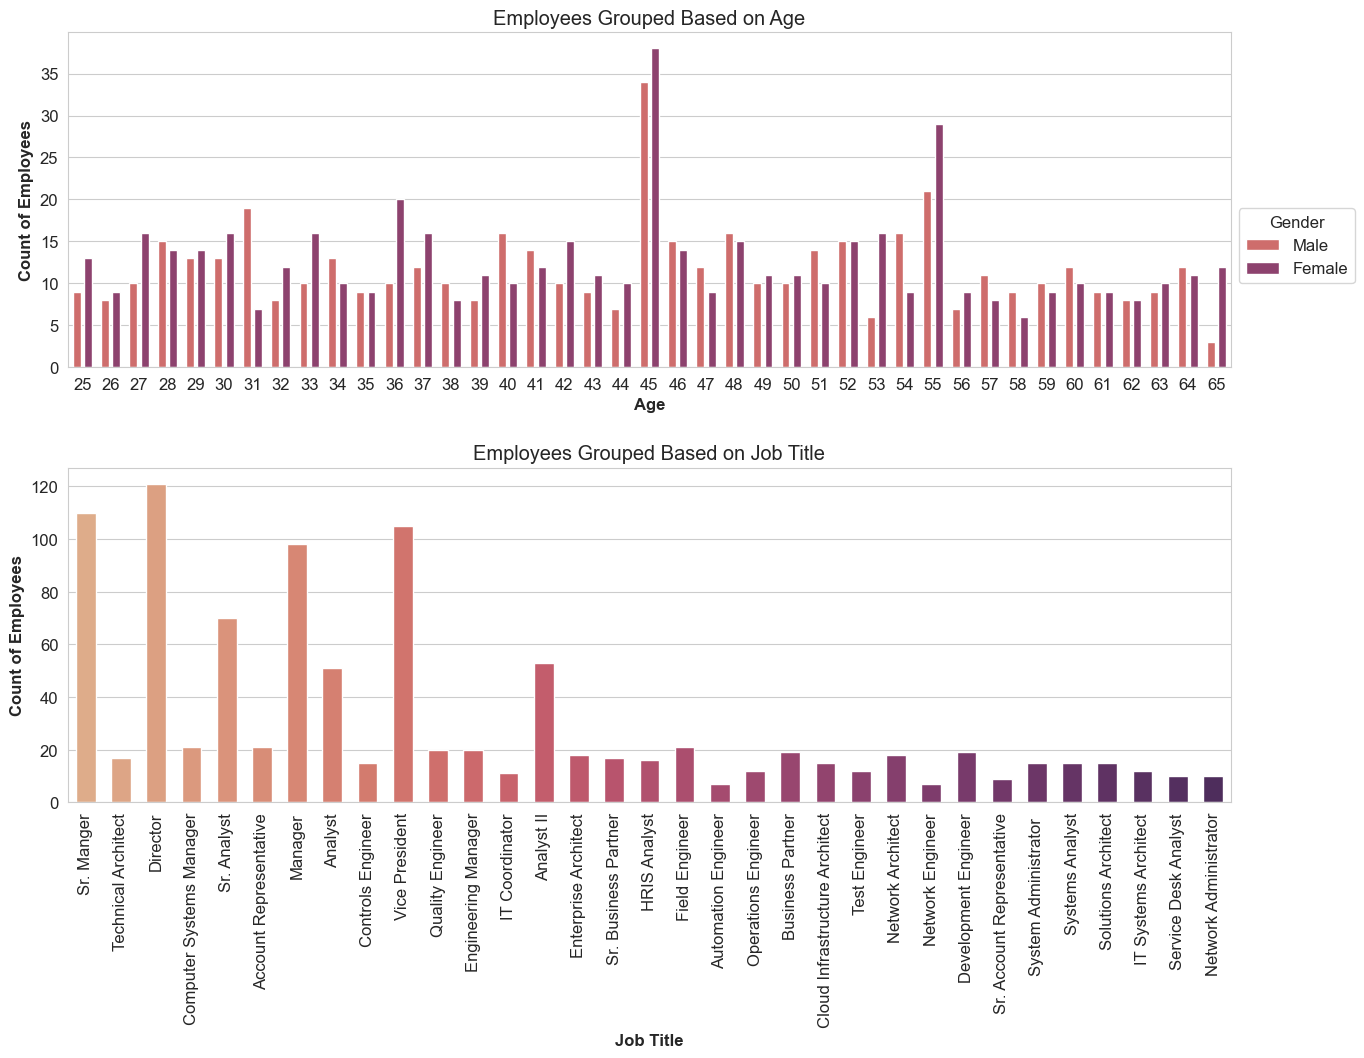

In [57]:
plt.figure(figsize=(15, 10))
plt.subplot(2,1,1)
sns.countplot(df, x = 'age', gap=0.3, palette='flare', hue='gender')
plt.title('Employees Grouped Based on Age')
plt.xlabel('Age', fontdict={'fontsize':12, 'fontweight':'bold'})
plt.ylabel('Count of Employees', fontdict={'fontsize':12, 'fontweight':'bold'})
plt.legend(loc='best', bbox_to_anchor=(1, 0.5), title='Gender')
plt.subplots_adjust(hspace=0.3)
plt.subplot(2,1,2)
sns.countplot(df, x = 'job_title', gap=0.3, palette='flare', hue='job_title', legend=False)
plt.title('Employees Grouped Based on Job Title')
plt.xlabel('Job Title', fontdict={'fontsize':12, 'fontweight':'bold'})
plt.ylabel('Count of Employees', fontdict={'fontsize':12, 'fontweight':'bold'})
# plt.legend(loc='best', bbox_to_anchor=(1, 0.5), title='Business Unit')
plt.xticks(rotation=90)
plt.show()

In [42]:
avg_salary_by_job = df.groupby('job_title').agg({'annual_salary':'mean'})
avg_salary_by_job['annual_salary'] = avg_salary_by_job['annual_salary'].round(0)

##### Top Paying Jobs Among The Lot

In [43]:
avg_salary_by_job.sort_values(by='annual_salary', ascending=False).head()

,annual_salary
job_title,
Vice President,222195.0
Director,171634.0
Sr. Manger,141068.0
Manager,113276.0
Engineering Manager,101854.0


###### Average Salary Of an Employee Based of their Business Unit

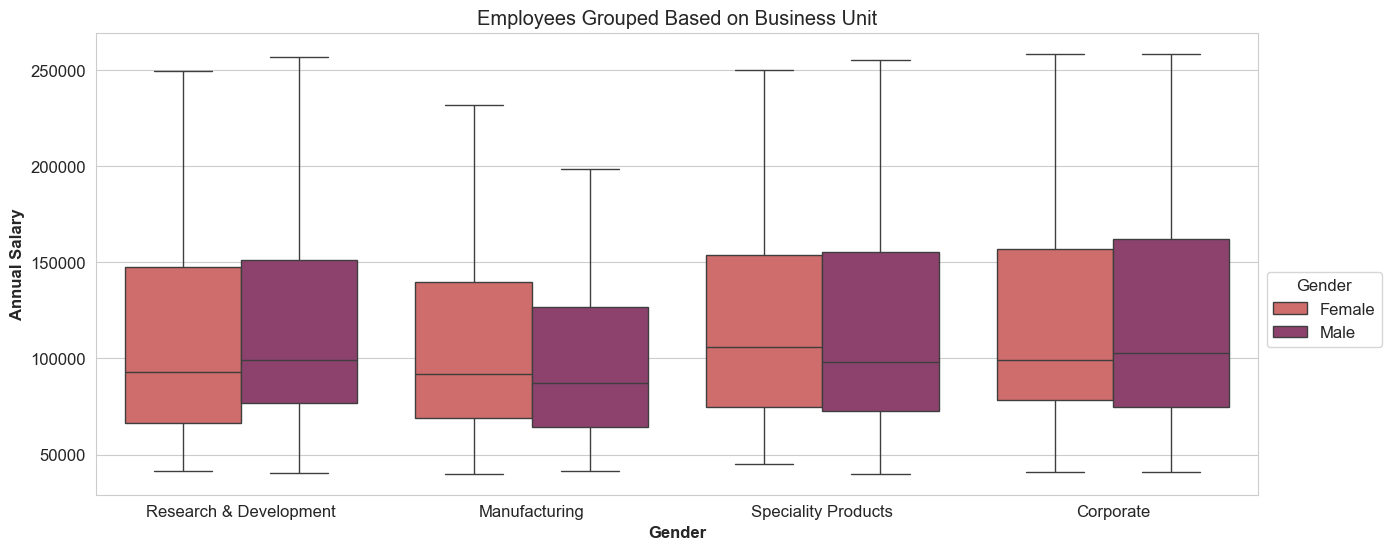

In [44]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='business_unit', y='annual_salary', hue='gender', palette='flare', showfliers=False)
plt.title('Employees Grouped Based on Business Unit')
plt.xlabel('Gender', fontdict={'fontsize':12, 'fontweight':'bold'})
plt.ylabel('Annual Salary', fontdict={'fontsize':12, 'fontweight':'bold'})
plt.legend(loc='best', bbox_to_anchor=(1, 0.5), title='Gender')
plt.show()

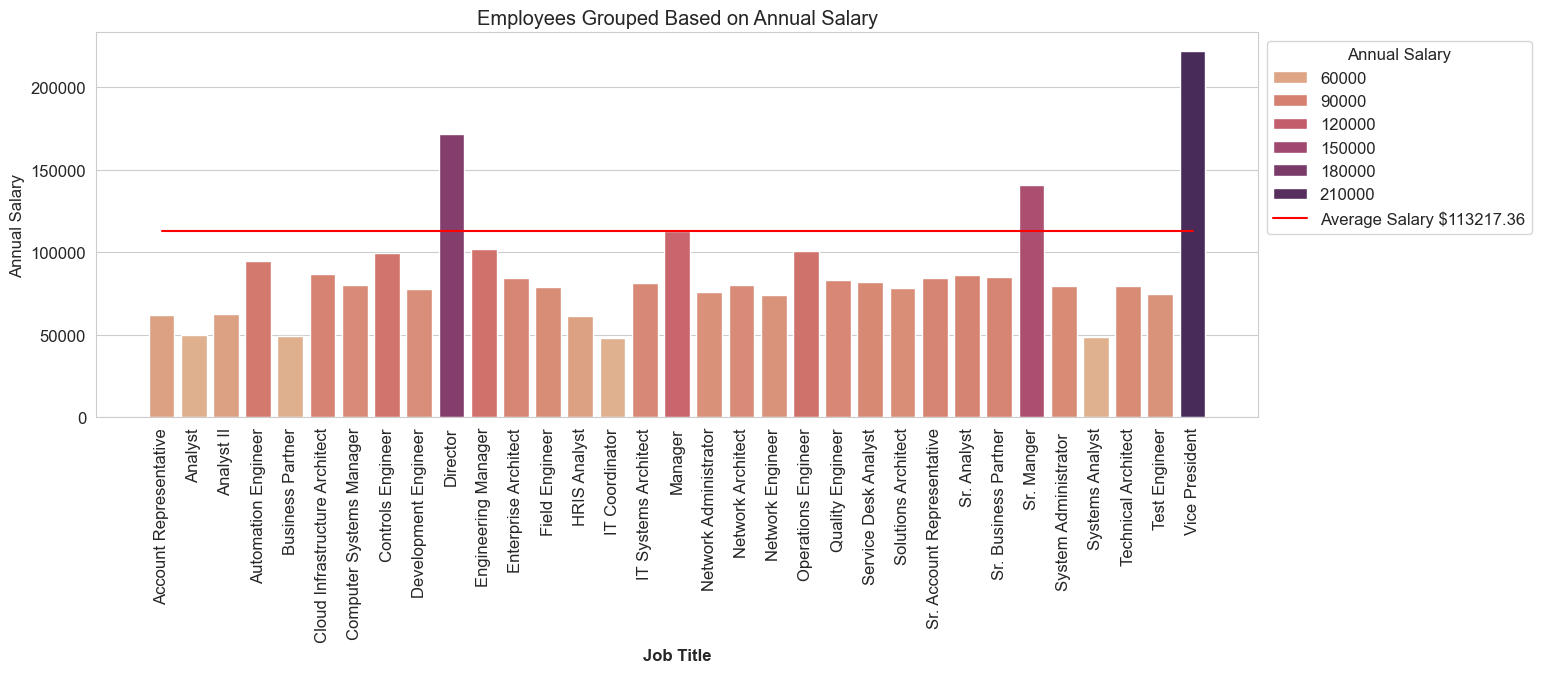

In [47]:
plt.figure(figsize=(15, 5))
sns.barplot(data=avg_salary_by_job , x='job_title', y='annual_salary', hue='annual_salary' , palette='flare')
sns.lineplot(data=avg_salary_by_job , x='job_title', y=(df['annual_salary'].mean()), color='red', label=f'Average Salary ${df['annual_salary'].mean().round(2)}')
plt.title('Employees Grouped Based on Annual Salary')
plt.xlabel('Job Title', fontdict={'fontsize':12, 'fontweight':'bold'})
plt.ylabel('Annual Salary')
plt.legend(loc='best', bbox_to_anchor=(1, 1), title='Annual Salary')
plt.xticks(rotation=90)
plt.show()

###### Average Annual Salary Of a Employee based on the Department they work and their Gender

In [48]:
avg_salary_by_dept = pd.read_sql_query("select gender, department, AVG(annual_salary) from employees group by gender, department order by 2", con=engine.connect())

In [49]:
avg_salary_by_dept

,gender,department,avg
0,Male,Accounting,114139.046512
1,Female,Accounting,130455.245283
2,Male,Engineering,113460.346154
3,Female,Engineering,104720.700000
4,Male,Finance,123760.921569
5,Female,Finance,122094.782609
6,Male,Human Resources,115802.934426
7,Female,Human Resources,120208.218750
8,Male,IT,100187.909836
9,Female,IT,95332.554622


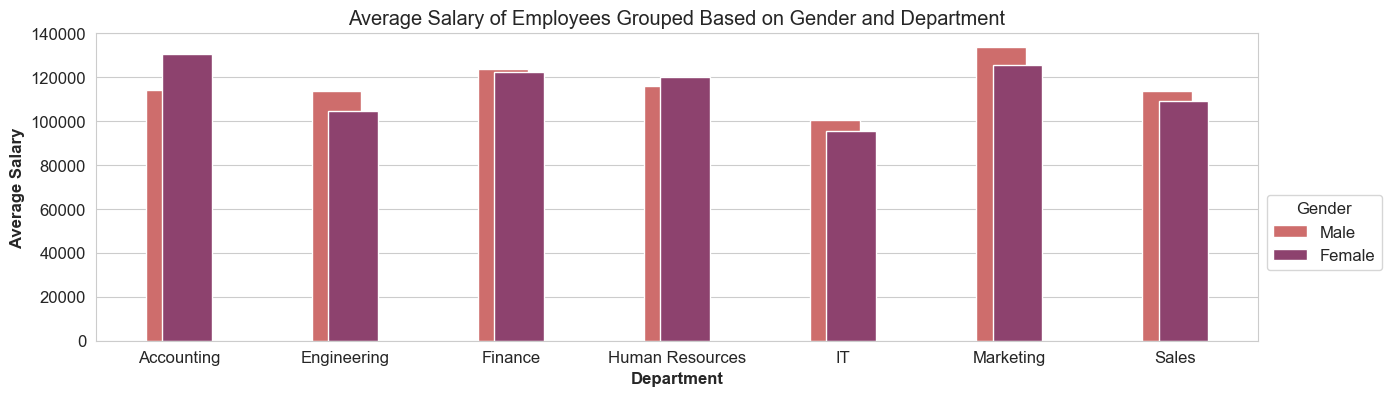

In [50]:
plt.figure(figsize=(15, 4))
sns.barplot(data = avg_salary_by_dept, x='department', y='avg', hue='gender', palette='flare', gap=4, width=0.2)
plt.title('Average Salary of Employees Grouped Based on Gender and Department')
plt.xlabel('Department', fontdict={'fontsize':12, 'fontweight':'bold'})
plt.ylabel('Average Salary', fontdict={'fontsize':12, 'fontweight':'bold'})
plt.legend(loc='best', bbox_to_anchor=(1, 0.5), title='Gender')
# plt.xticks(rotation=5)
plt.show()

###### Finding The Range of Salary Offered To the Employees by Age

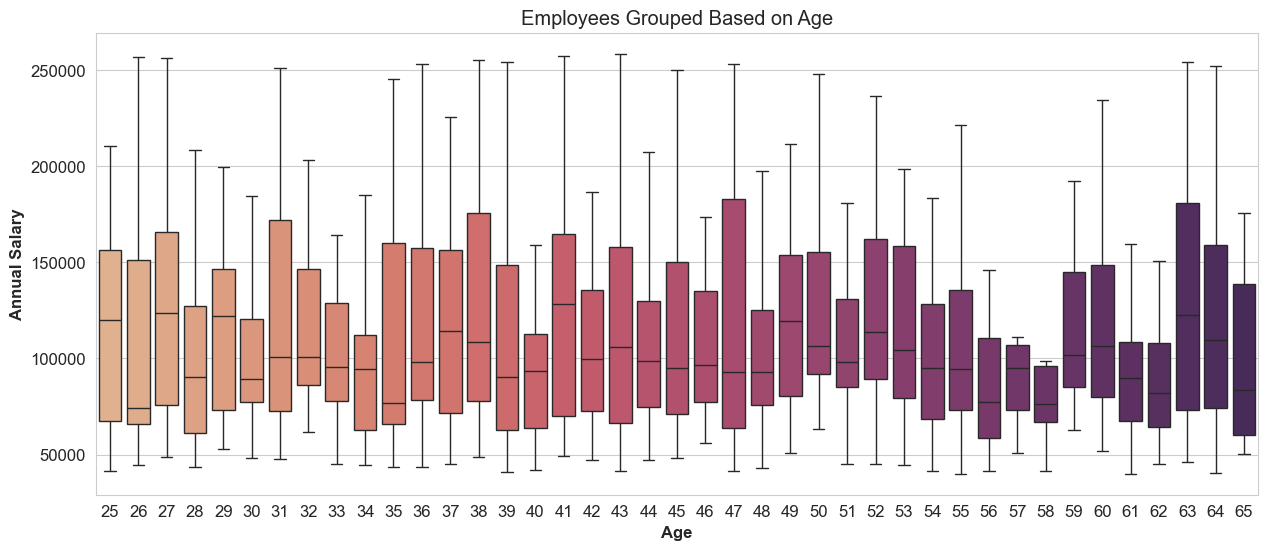

In [51]:
plt.figure(figsize=(15, 6))
sns.boxplot(df, x='age', y='annual_salary', hue='age', palette='flare', legend=False, showfliers=False)
plt.title('Employees Grouped Based on Age')
plt.xlabel('Age', fontdict={'fontsize':12, 'fontweight':'bold'})
plt.ylabel('Annual Salary', fontdict={'fontsize':12, 'fontweight':'bold'})
plt.show()

###### Finding the average age of the Employee in each of the designation

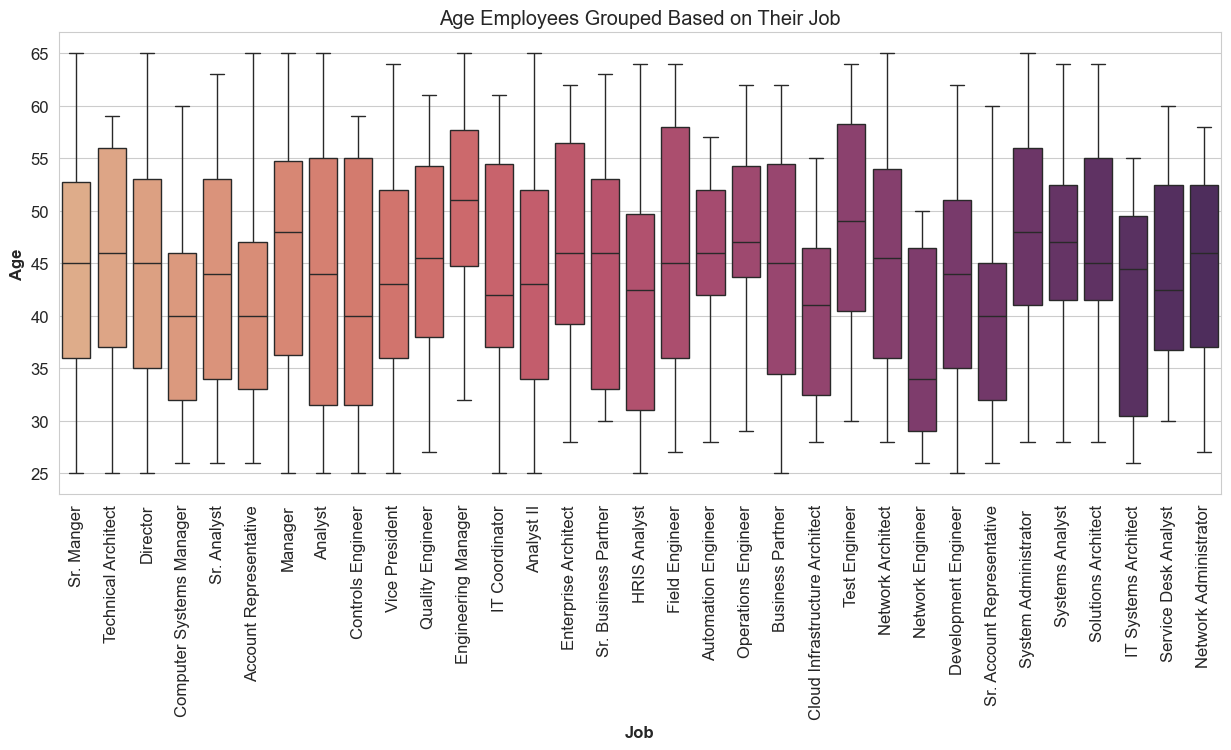

In [52]:
plt.figure(figsize=(15, 6))
sns.boxplot(df, x='job_title', y='age', hue='job_title', palette='flare', legend=False)
plt.title('Age Employees Grouped Based on Their Job')
plt.xlabel('Job', fontdict={'fontsize':12, 'fontweight':'bold'})
plt.ylabel('Age', fontdict={'fontsize':12, 'fontweight':'bold'})
plt.xticks(rotation=90)
plt.show()

##### Average Age of the Employees based of their Country of Working

In [53]:
df.groupby(['country', 'city']).agg({'age':'mean'})

age
country       city                     
Brazil        Manaus          46.000000
              Rio de Janerio  42.454545
              Sao Paulo       42.792453
China         Beijing         46.309091
              Chengdu         42.456522
              Chongqing       46.692308
              Shanghai        45.384615
United States Austin          44.848485
              Chicago         43.652174
              Columbus        43.716814
              Miami           44.375000
              Phoenix         44.302752
              Seattle         44.271186

###### Average Salary of an Employee Based of their Place od Work

In [54]:
avg_sal_by_city = pd.read_sql_query("SELECT country, city, annual_salary FROM employees ORDER BY 1", con=engine.connect())

In [55]:
avg_sal_by_city.groupby(['country', 'city']).agg({'annual_salary':'mean'})

annual_salary
country       city                         
Brazil        Manaus          115079.500000
              Rio de Janerio  108275.931818
              Sao Paulo       113503.245283
China         Beijing         108979.890909
              Chengdu         110387.369565
              Chongqing       115434.953846
              Shanghai        119972.019231
United States Austin          116000.767677
              Chicago         112293.413043
              Columbus        116108.380531
              Miami           112765.250000
              Phoenix         107438.834862
              Seattle         114532.415254

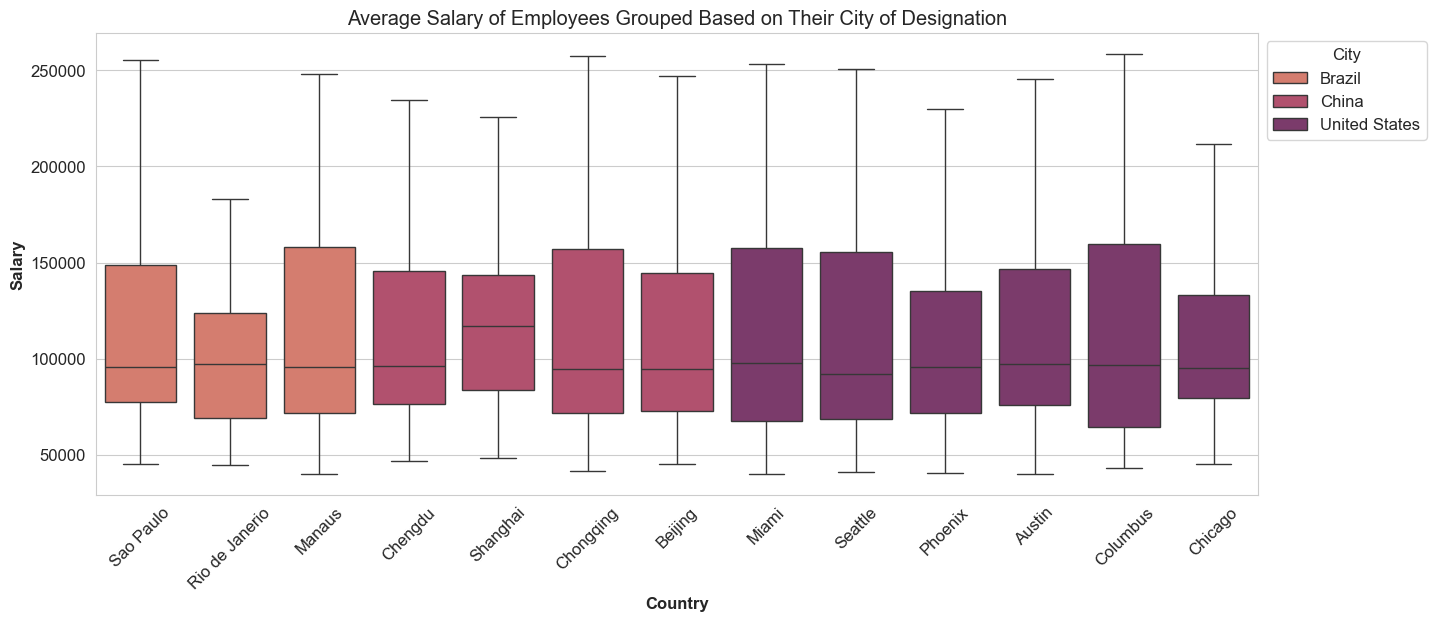

In [56]:
plt.figure(figsize=(15, 6))
sns.boxplot(avg_sal_by_city, x='city', y='annual_salary', hue='country', palette='flare', showfliers=False)
plt.title('Average Salary of Employees Grouped Based on Their City of Designation')
plt.xlabel('Country', fontdict={'fontsize':12, 'fontweight':'bold'})
plt.xticks(rotation=45)
plt.ylabel('Salary', fontdict={'fontsize':12, 'fontweight':'bold'})
plt.legend(loc='best', bbox_to_anchor=(1, 1), title='City')
plt.show()

***And That's all the Things that I have done to the available data, with that I have learnt some Techniques and Tricks that can come in handy for another Time.***